# Resize the images and save it in 512x512

In [ ]:
import os
import cv2
root_path = '/content/drive/MyDrive/nail_white'
save_path = '/content/drive/MyDrive/nail_white_re'
if not os.path.exists(save_path):
  os.mkdir(save_path)

mask_folder_save_path = os.path.join(save_path,'mask')
image_folder_save_path = os.path.join(save_path,'image')

if not os.path.exists(mask_folder_save_path):
  os.mkdir(mask_folder_save_path)

if not os.path.exists(image_folder_save_path):
  os.mkdir(image_folder_save_path )

image_folder_path = os.path.join(root_path,'image')
mask_folder_path = os.path.join(root_path,'mask')
for file in os.listdir(image_folder_path):
  image_path = os.path.join(image_folder_path,file)
  mask_path = os.path.join(mask_folder_path,file.split('.')[0]+'.jpg')
  print(mask_path)
  mask = cv2.imread(mask_path)
  image = cv2.imread(image_path)
  mask = cv2.resize(mask,(512,512))
  image = cv2.resize(image,(512,512))
  image_save_path = os.path.join(image_folder_save_path,file)
  mask_save_path = os.path.join(mask_folder_save_path,file)
  cv2.imwrite(image_save_path,image)
  cv2.imwrite(mask_save_path,mask)



/content/drive/MyDrive/nail_white/mask/IMG_20230328_090735.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090747.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090750.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090753.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090756.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090809.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090812.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090825.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090828.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090833.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090838.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090902.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090919.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090923.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090959.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_091

In [ ]:
import os
import cv2
image_folder_path = '/content/drive/MyDrive/dataset_image_inpainting_2/image'
save_folder_path = '/content/drive/MyDrive/dataset_image_inpainting_2_resized/image'
for file in os.listdir(image_folder_path):
  print(file)
  image = cv2.imread(os.path.join(image_folder_path,file))
  image = cv2.resize(image,(512,512))
  image_save = os.path.join(save_folder_path,file)
  cv2.imwrite(image_save,image)


IMG_20221227_180339.png
IMG_20221227_180342.png
IMG_20221227_180344.png
IMG_20221227_180358.png
IMG_20221227_180400.png
IMG_20221227_180402.png
IMG_20221227_180407.png
IMG_20221227_180409.png
IMG_20221227_180411.png
IMG_20221227_180413.png
IMG_20221227_180416.png
IMG_20221227_180429.png


#Stable Diffusion Inpainting

In [ ]:
#@title Install the required libs
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 22420, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 22420 (delta 137), reused 141 (delta 80), pack-reused 22183
Receiving objects: 100% (22420/22420), 15.05 MiB | 37.40 MiB/s, done.
Resolving deltas: 100% (15997/15997), done.


In [ ]:
cd /content/diffusers/examples/research_projects/dreambooth_inpaint

/content/diffusers/examples/research_projects/dreambooth_inpaint


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bitsandbytesa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement bitsandbytesa (from versions: none)
ERROR: No matching distribution found for bitsandbytesa


In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/nail_varied/image
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_nail_varied

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/nail_varied/image
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_nail_varied


In [ ]:
!rm -rf /content/drive/MyDrive/diffusion_model_with_nail_varied

In [ ]:
#Test 1

# !accelerate launch train_dreambooth_inpaint.py \
#   --pretrained_model_name_or_path=$MODEL_NAME  \
#   --instance_data_dir=$INSTANCE_DIR \
#   --output_dir=$OUTPUT_DIR \
#   --instance_prompt="a nail with design sks" \
#   --resolution=512 \
#   --train_batch_size=1 \
#   --gradient_accumulation_steps=1 --gradient_checkpointing \
#   --use_8bit_adam \
#   --learning_rate=5e-6 \
#   --lr_scheduler="constant" \
#   --lr_warmup_steps=0 \
#   --max_train_steps=800

!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a nail with style bkka" \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=2000 \
  --train_text_encoder \
  --resume_from_checkpoint=latest


# !accelerate launch train_dreambooth_inpaint.py \
#   --pretrained_model_name_or_path=$MODEL_NAME  \
#   --instance_data_dir=$INSTANCE_DIR \
#   --output_dir=$OUTPUT_DIR \
#   --instance_prompt="jjnn" \
#   --resolution=512 \
#   --class_prompt="nail with nail paint" \
#   --train_batch_size=1 \
#   --gradient_accumulation_steps=2 --gradient_checkpointing \
#   --learning_rate=5e-6 \
#   --lr_scheduler="constant" \
#   --lr_warmup_steps=0 \
#   --max_train_steps=1000 \
#   --num_class_images=200 \
#   --train_text_encoder

# !accelerate launch train_dreambooth_inpaint.py \
#   --pretrained_model_name_or_path=$MODEL_NAME  \
#   --instance_data_dir=$INSTANCE_DIR \
#   --output_dir=$OUTPUT_DIR \
#   --instance_prompt="jjnn" \
#   --resolution=512 \
#   --train_batch_size=1 \
#   --gradient_accumulation_steps=2 --gradient_checkpointing \
#   --learning_rate=5e-6 \
#   --lr_scheduler="constant" \
#   --lr_warmup_steps=0 \
#   --max_train_steps=3000 \
#   --train_text_encoder

  #Removed accelerator_project_config



# !accelerate launch train_dreambooth_inpaint.py \
#   --pretrained_model_name_or_path=$MODEL_NAME  \
#   --instance_data_dir=$INSTANCE_DIR \
#   --output_dir=$OUTPUT_DIR \
#   --instance_prompt="kknn" \
#   --resolution=512 \
#   --train_batch_size=1 \
#   --learning_rate=5e-6 \
#   --lr_scheduler="constant" \
#   --lr_warmup_steps=0 \
#   --max_train_steps=1200 \
#   --train_text_encoder 

  # --resume_from_checkpoint=latest
  # --gradient_accumulation_steps=1 --gradient_checkpointing \

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2023-03-21 17:25:42.243870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 17:25:42.406629: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environme

  0%|          | 0/200 [00:00<?, ?it/s]

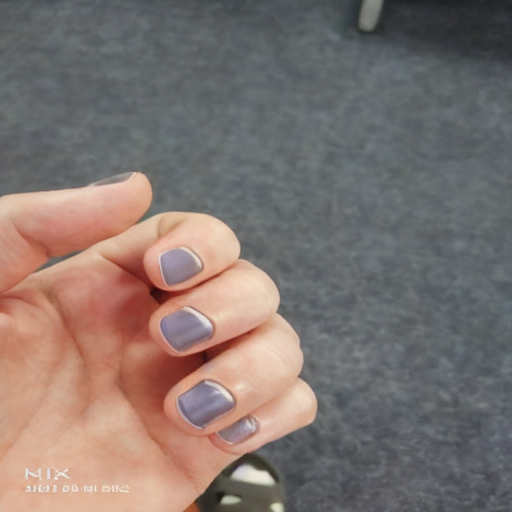

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch
import numpy as np

pipe = StableDiffusionInpaintPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_style_nail_opaque",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

# prompt = "a nail with jjnn glossy blended very high quality"
prompt = "ganduhaikyagghhgg glossy very high quality very reflective and glossy"


from PIL import Image

def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

mask = Image.open('/content/drive/MyDrive/test_nails/4c478f3e-e402-11e8-97db-0242ac1c0002 (1).jpg')
mask = mask.resize((512,512))
array = np.zeros([512, 512, 3],
                 dtype = np.uint8)
array[:, :] = [255, 255, 255] 
img  = Image.open('/content/drive/MyDrive/test_nails/4c478f3e-e402-11e8-97db-0242ac1c0002 (1).jpg')
img = img.resize((512,512))
generator = torch.Generator("cuda").manual_seed(78688)
image = pipe(prompt=prompt, image=img, mask_image=mask, num_inference_steps=200, guidance_scale=7.5, generator=generator).images[0]
image


In [ ]:
image = np.array(image)

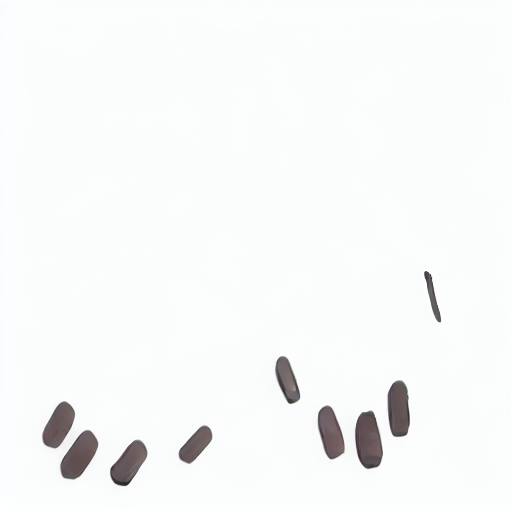

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

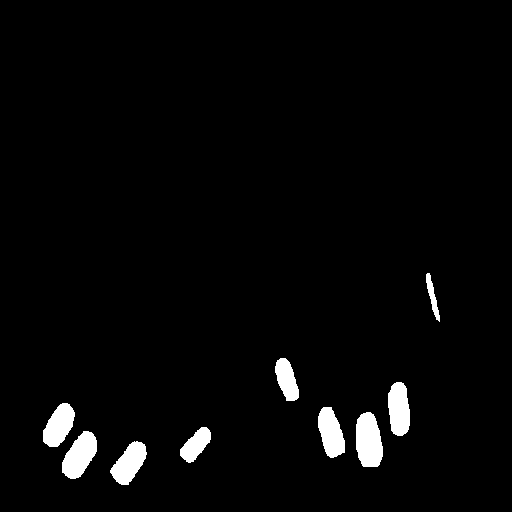

In [ ]:
mask = cv2.imread('/content/drive/MyDrive/test_nails/2C29D473-CCB4-458C-926B-99D0042161E6 (1).jpg')

mask = cv2.resize(mask,(512,512))

mask[mask < 250] = 0
mask[mask > 250] = 255
cv2_imshow(mask)

In [ ]:
print(np.unique(mask))

[  0 250 255]


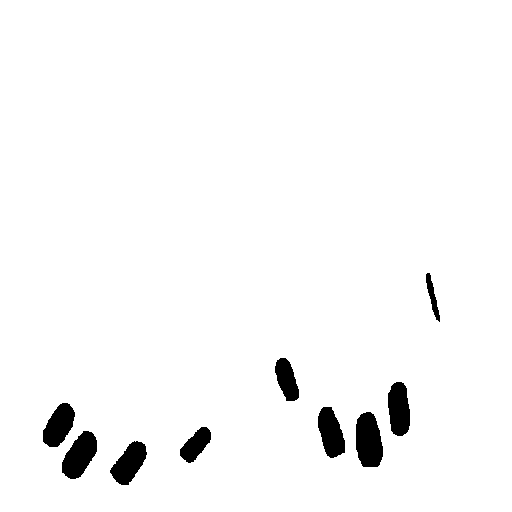

In [ ]:
Mask = cv2.bitwise_not(mask)
cv2_imshow(Mask)

[  0 255]


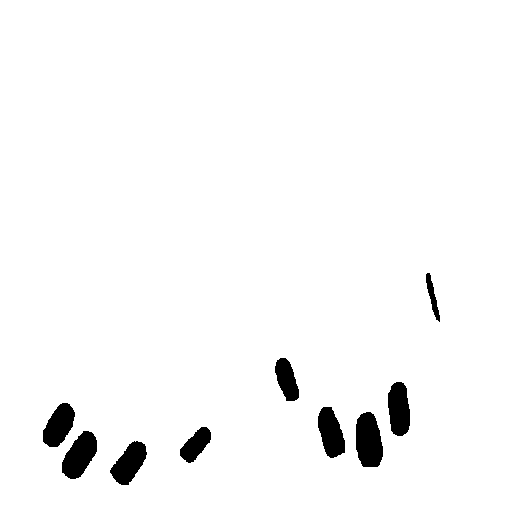

In [ ]:
Mask[Mask < 255] = 0
print(np.unique(Mask))

cv2_imshow(Mask)

In [ ]:
print(Mask.shape)

(512, 512, 3)


In [ ]:
img  = cv2.imread('/content/drive/MyDrive/test_nails/2C29D473-CCB4-458C-926B-99D0042161E6.jpg')
img = cv2.resize(img,(512,512))

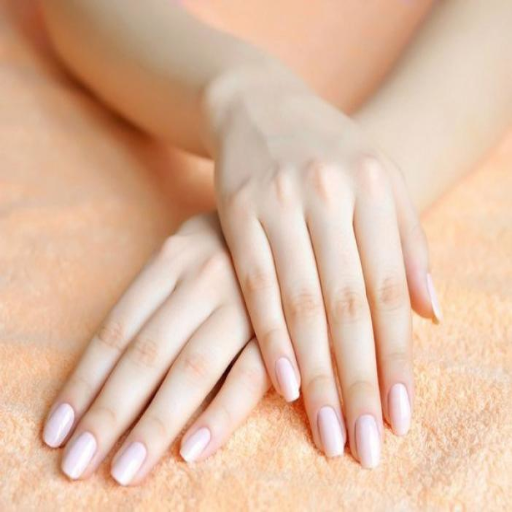

In [ ]:
cv2_imshow(img)

In [ ]:
new_img = cv2.bitwise_or(img, img, mask = Mask[:,:,1])

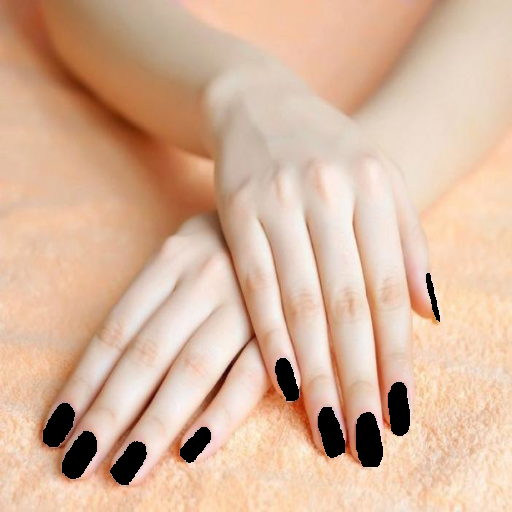

In [ ]:
cv2_imshow(new_img)

In [ ]:
print(np.unique(new_img))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
igg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
gray = cv2.cvtColor(igg, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

igg[thresh == 255] = 0

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erosion = cv2.erode(igg, kernel, iterations = 1)

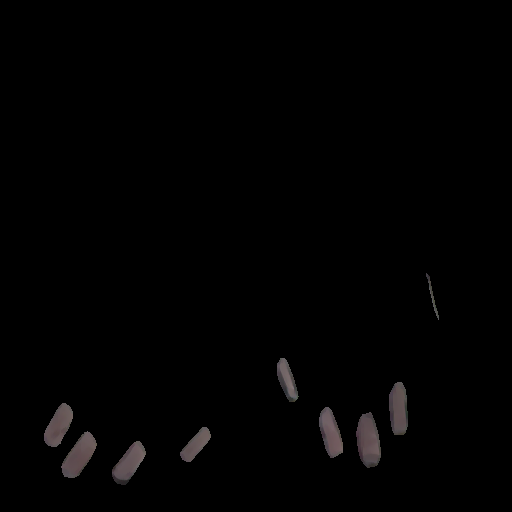

In [ ]:
cv2_imshow(erosion)

In [ ]:
np.unique(erosion, return_counts=True)

(array([  0,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        128, 129, 130], dtype=uint8),
 array([767172,     15,     23,     19,      9,     18,     49,     22,
            12,     23,     16,     36,     39,     27,     43,     61,
            51,     28,     56,     65,     76,     63,     52,     47,
            73,    115,    116,    140,    125,    142,    157,    134,
           169,    201,    161,    218,    197,    210,    301,    308,
           432,    493,    481,    537,    670,    710,    755,    717,
           661,    

In [ ]:
print(np.unique(erosion,return_counts=True))

(array([  0,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       128, 129, 130], dtype=uint8), array([767172,     15,     23,     19,      9,     18,     49,     22,
           12,     23,     16,     36,     39,     27,     43,     61,
           51,     28,     56,     65,     76,     63,     52,     47,
           73,    115,    116,    140,    125,    142,    157,    134,
          169,    201,    161,    218,    197,    210,    301,    308,
          432,    493,    481,    537,    670,    710,    755,    717,
          661,    552,    581,  

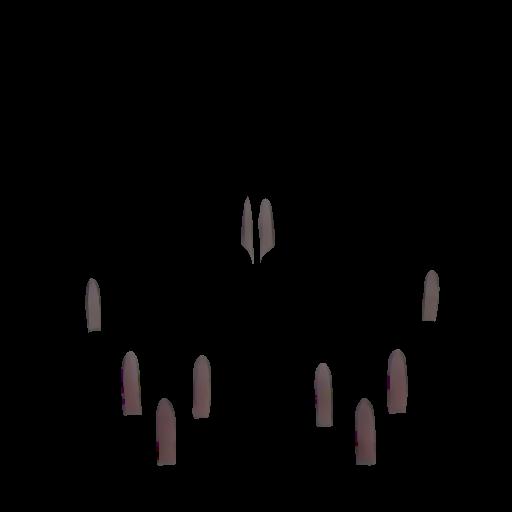

In [ ]:
cv2_imshow(nn)

In [ ]:
new_img_2 = cv2.add(erosion, new_img)

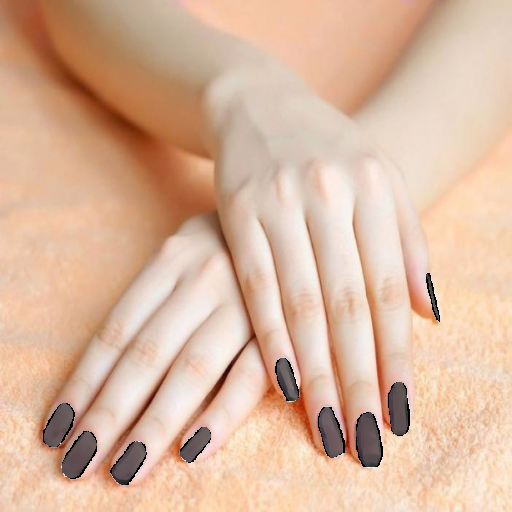

In [ ]:
cv2_imshow(new_img_2)

In [ ]:
black_pixels = np.where(
    (new_img_2[:, :, 0] == 0) & 
    (new_img_2[:, :, 1] == 0) & 
    (new_img_2[:, :, 2] == 0)
)

# set those pixels to white
new_img_2[black_pixels] = [255, 255, 255]

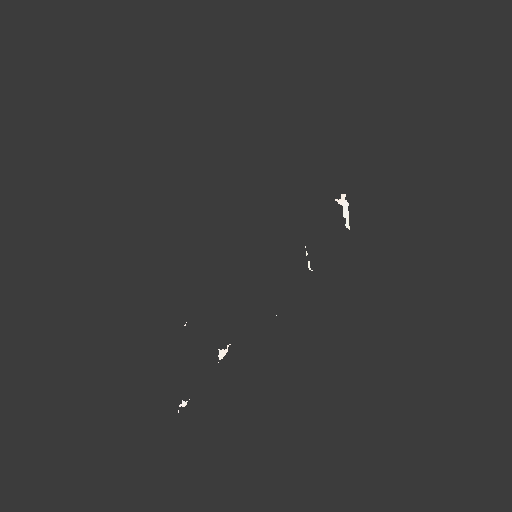

In [ ]:
gray = cv2.cvtColor(new_img_2, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

new_img_2[thresh == 255] = 60

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
new_img_3 = cv2.erode(new_img_2, kernel, iterations = 1)
cv2_imshow(new_img_3)

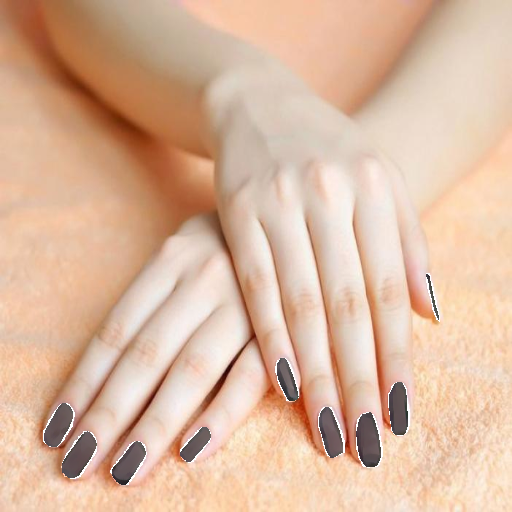

In [ ]:
cv2_imshow(new_img_2)

In [ ]:
from google.colab import runtime
runtime.unassign()

#Experiment with ToyCat

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/toy_cat
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_toy_cat

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/toy_cat
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_toy_cat


In [ ]:
!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="kckcaa" \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1200 \
  --train_text_encoder 

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2023-03-17 17:52:49.836871: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 17:52:49.836981: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 17:52:49.837001: W tensorflow/compiler/tf2

In [ ]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [ ]:
import requests
import PIL
from io import BytesIO

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

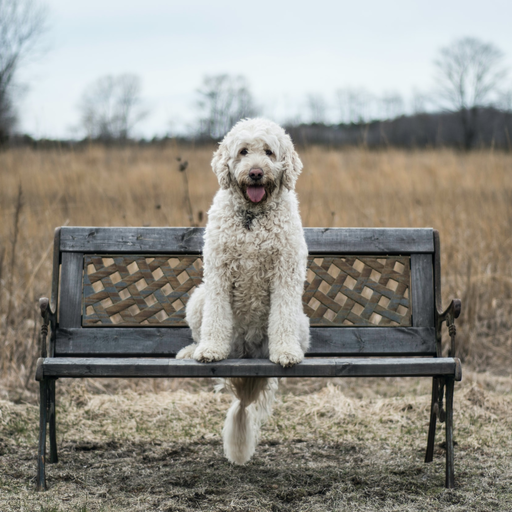

In [ ]:
image = download_image(img_url).resize((512, 512))
image

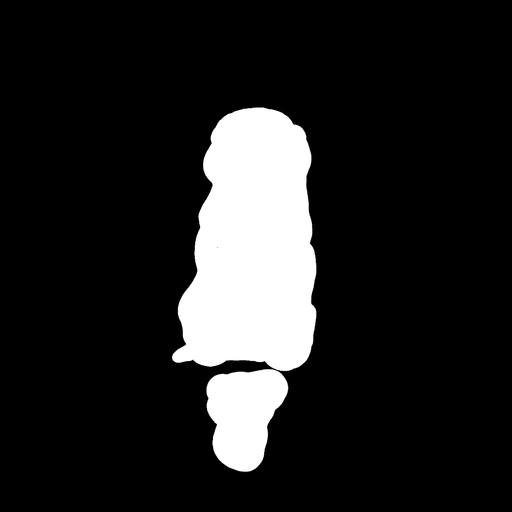

In [ ]:
mask_image = download_image(mask_url).resize((512, 512))
mask_image

  0%|          | 0/100 [00:00<?, ?it/s]

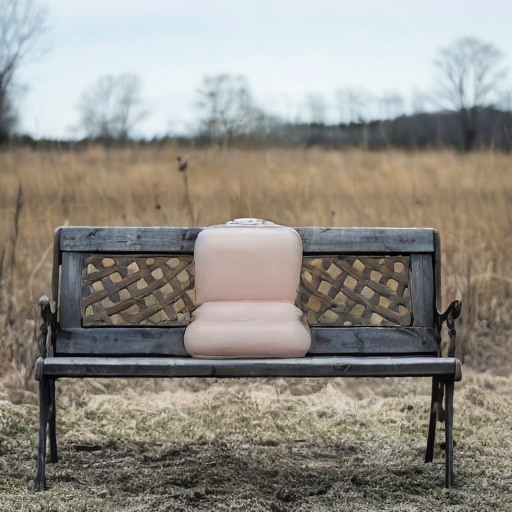

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_with_nailHands_random_mask",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

# prompt = "a nail with jjnn glossy blended very high quality"
prompt = "a nail design bkka"


from PIL import Image

def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

# generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt=prompt, image=image, mask_image=mask_image, num_inference_steps=100, guidance_scale=7.5).images[0]
image


In [ ]:
from google.colab import runtime
runtime.unassign()

### Experiment 2 with Cropped

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/image
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped


In [ ]:

!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="jjnn" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 --gradient_checkpointing \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1000 \
  --train_text_encoder

2023-03-08 09:04:36.891419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 09:04:37.078646: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-08 09:04:37.787146: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-08 09:04:37.787237: W tensorflow/compiler/xla/stream_executor

## Experiment 3 with cropped and epoch more 500 and resuming

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/image
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/image
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped
env: CHECK_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped/checkpoint-1000


In [ ]:

!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="jjnn" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 --gradient_checkpointing \
  --learning_rate=5e-5 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=4500 \
  --train_text_encoder \
  --resume_from_checkpoint=latest


2023-03-08 19:57:21.684884: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-08 19:57:21.685481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-08 19:57:21.685504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a 

## Experiment 4 with high learning rate

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/image
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped_high_lr

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/image
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_with_resized_cropped_high_lr


In [ ]:

!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="jjnn" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 --gradient_checkpointing \
  --learning_rate=5e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1000 \
  --train_text_encoder \
  --resume_from_checkpoint=latest


2023-03-09 18:40:25.730704: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 18:40:25.893957: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-09 18:40:26.668037: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-09 18:40:26.668127: W tensorflow/compiler/xla/stream_executor

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_with_resized_cropped_high_lr",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

#prompt = "a nail with jjnn glossy blended very high quality"
prompt = "jjnn"

from PIL import Image

def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

mask = Image.open('/content/drive/MyDrive/nails_for_testing/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg')
mask = mask.resize((512,512))
img  = Image.open('/content/drive/MyDrive/nails_for_testing/09aefeec-e05f-11e8-87a6-0242ac1c0002_org.jpg')
img = img.resize((512,512))
generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt=prompt, image=img, mask_image=mask, num_inference_steps=250, guidance_scale=7.5, generator=generator).images[0]
image


OSError: ignored

# Stable Diffusion Training (Not Inpainting)

In [ ]:
#@title Install the required libs
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 22768, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 22768 (delta 3), reused 6 (delta 3), pack-reused 22753
Receiving objects: 100% (22768/22768), 15.32 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (16287/16287), done.


In [ ]:
cd /content/diffusers/examples/dreambooth

/content/diffusers/examples/dreambooth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Experiment 1

In [ ]:
cd /content/diffusers/examples/dreambooth

/content/diffusers/examples/dreambooth


In [ ]:


%env MODEL_NAME=runwayml/stable-diffusion-v1-5
%env INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_no_inpaint

!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="kknm" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing  \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1200 \
  --train_text_encoder

env: MODEL_NAME=runwayml/stable-diffusion-v1-5
env: INSTANCE_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_no_inpaint
2023-02-26 09:21:03.825610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-02-26 09:21:03.825729: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-02-26 09:21:03.825748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libr

## Experiment 2

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-v1-5
%env INSTANCE_DIR=/content/drive/MyDrive/utensil
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_no_inpaint_1000

!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="with style jhantu" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing  \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1000 \
  --train_text_encoder

2023-03-31 14:00:39.619180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/accelerate/accelerator.py:249: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
03/31/2023 14:00:40 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'sample_max_value', 'variance_type', 'dynamic_thresholding_ratio', 'prediction_type', 'thresholding', 'clip_sample_range'} was not found in config. Values will be initialized to default values.
{'scaling_factor'} was not found in config. Values will be initialized to default values.
{'mid_block_type', 'resnet_time_scale_shift', 'conv_in_ker

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_no_inpaint_1000",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy
prompt = "a bowl with style jhantu"

# generator = torch.Generator("cuda").manual_seed(3342)
image = pipe(prompt=prompt, num_inference_steps=250, guidance_scale=7.5).images[0]
image

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 8>:8                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/diffusers/pipelines/pipeline_utils.py:576 in to           │
│                                                                                                  │
│    573 │   │   for name in module_names.keys():                                                  │
│    574 │   │   │   module = getattr(self, name)                                                  │
│    575 │   │   │   if isinstance(module, torch.nn.Module):                                       │
│ ❱  576 │   │   │   │   module.to(torch_device, torch_dtype)                                      │
│    577 │   │   │   │   if (                                                                      │
│    578 │   │   │   │   │   module.dtype == torch.float16                                         │
│    579 │   │   │   │   │   and str(torch_device) in ["cpu"]                                      │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/transformers/modeling_utils.py:1811 in to                 │
│                                                                                                  │
│   1808 │   │   │   │   " model has already been set to the correct devices and casted to the co  │
│   1809 │   │   │   )                                                                             │
│   1810 │   │   else:                                                                             │
│ ❱ 1811 │   │   │   return super().to(*args, **kwargs)                                            │
│   1812 │                                                                                         │
│   1813 │   def half(self, *args):                                                                │
│   1814 │   │   # Checks if the model has been loaded in 8-bit                                    │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1145 in to                     │
│                                                                                                  │
│   1142 │   │   │   │   │   │   │   non_blocking, memory_format=convert_to_format)                │
│   1143 │   │   │   return t.to(device, dtype if t.is_floating_point() or t.is_complex() else No  │
│   1144 │   │                                                                                     │
│ ❱ 1145 │   │   return self._apply(convert)                                                       │
│   1146 │                                                                                         │
│   1147 │   def register_full_backward_pre_hook(                                                  │
│   1148 │   │   self,                                                                             │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:797 in _apply                  │
│                                                                                                  │
│    794 │                                                                                         │
│    795 │   def _apply(self, fn):                                                                 │
│    796 │   │   for module in self.children():                                                    │
│ ❱  797 │   │   │   module._apply(fn)                                                             │
│    798 │   │                                               

## Text2Img

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

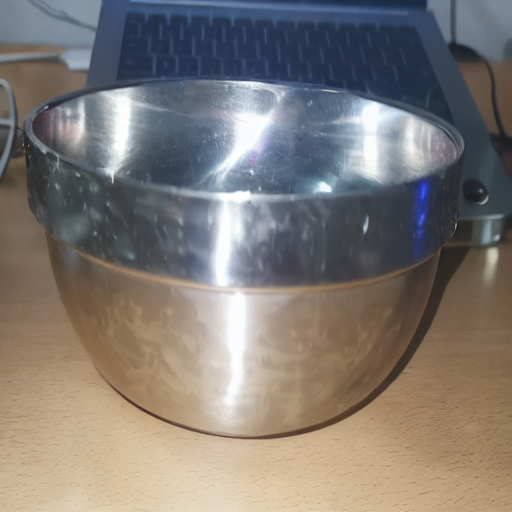

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_no_inpaint_1000",
     torch_dtype=torch.float16,
)

pipe = pipe.to("cuda")
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy
prompt = "with style jhantu"

img  = Image.open('/content/drive/MyDrive/test_utensil/测试图片/IMG_20230331_214541_edit_50276943346494.jpg').convert("RGB")
img = img.resize((512, 512))

generator = torch.Generator("cuda").manual_seed(3342)
images = pipe(prompt=prompt, image=img, strength=0.2, guidance_scale=20, num_inference_steps=250).images
images[0]

### Adding text encoder to the dreambooth model

In [ ]:
cd /content/diffusers/examples/textual_inversion

/content/diffusers/examples/textual_inversion


In [ ]:
# %env MODEL_NAME="/content/drive/MyDrive/diffusion_model_no_inpaint_1000"
%env DATA_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail

!accelerate launch textual_inversion.py \
  --pretrained_model_name_or_path='/content/drive/MyDrive/diffusion_model_no_inpaint_1000' \
  --train_data_dir=$DATA_DIR \
  --learnable_property="object" \
  --placeholder_token="nsjaa" --initializer_token="nail" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=3000 \
  --learning_rate=5.0e-04 --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="diffusion_model_no_inpaint_1000_ti"

env: MODEL_NAME=runwayml/stable-diffusion-v1-5
env: DATA_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail
2023-02-26 13:51:10.568932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-26 13:51:10.569021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-26 13:51:10.569038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
	`--num_processes` was set to a value of `1

In [ ]:
!cp -rf "/content/diffusers/examples/textual_inversion/diffusion_model_no_inpaint_1000_ti" "/content/drive/MyDrive"

  0%|          | 0/250 [00:00<?, ?it/s]

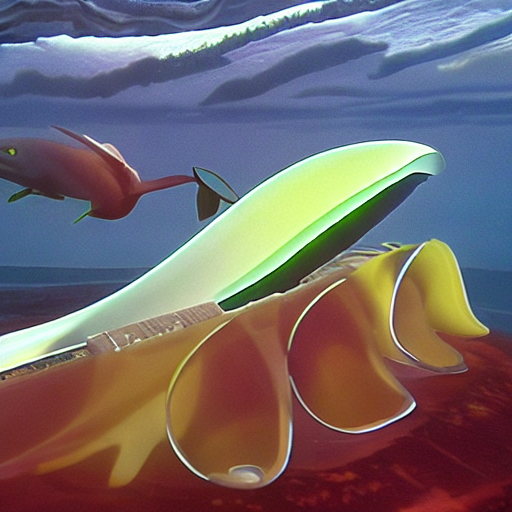

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_no_inpaint_1000_ti",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy
prompt = "nsjaa"

generator = torch.Generator("cuda").manual_seed(9867)
image = pipe(prompt=prompt, num_inference_steps=250, guidance_scale=7.5, generator=generator).images[0]
image

### Textual inversion scratch

In [ ]:
cd /content/diffusers/examples/textual_inversion

/content/diffusers/examples/textual_inversion


In [ ]:
# %env MODEL_NAME="/content/drive/MyDrive/diffusion_model_no_inpaint_1000"
%env DATA_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail
%env OUT_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized_ti_scratch
!accelerate launch textual_inversion.py \
  --pretrained_model_name_or_path='runwayml/stable-diffusion-v1-5' \
  --train_data_dir=$DATA_DIR \
  --learnable_property="object" \
  --placeholder_token="nsjaa" --initializer_token="nail" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=3000 \
  --learning_rate=5.0e-04 --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUT_DIR

env: DATA_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail
env: OUT_DIR=/content/drive/MyDrive/dataset_image_inpainting_2_resized_ti_scratch
2023-02-26 16:17:11.866428: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 16:17:12.751015: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-26 16:17:12.751129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared ob

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/250 [00:00<?, ?it/s]

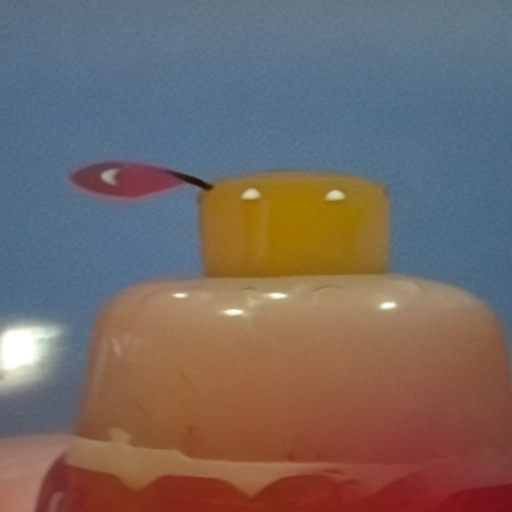

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
     "/content/drive/MyDrive/dataset_image_inpainting_2_resized_ti_scratch",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy
prompt = "nsjaa"

generator = torch.Generator("cuda").manual_seed(9867)
image = pipe(prompt=prompt, num_inference_steps=250, guidance_scale=7.5, generator=generator).images[0]
image

# Training with the not random mask, changes in the diffuser repo in Whizz Tech

In [ ]:
#@title Install the required libs
!pip install -U -qq git+https://github.com/Whizz-Technologies/diffusers
!pip install -qq accelerate transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/Whizz-Technologies/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 17734, done.
remote: Total 17734 (delta 0), reused 0 (delta 0), pack-reused 17734
Receiving objects: 100% (17734/17734), 13.04 MiB | 9.57 MiB/s, done.
Resolving deltas: 100% (12658/12658), done.


In [ ]:
cd /content/diffusers/examples/research_projects/dreambooth_inpaint

/content/diffusers/examples/research_projects/dreambooth_inpaint


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bitsandbytesa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement bitsandbytesa (from versions: none)
ERROR: No matching distribution found for bitsandbytesa


In [ ]:
!rm -rf /content/drive/MyDrive/diffusion_model_style_nail_white

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/nail_white_re/image
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_style_nail_white
%env MASK_DIR=/content/drive/MyDrive/nail_white_re/mask

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/nail_white_re/image
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_style_nail_white
env: MASK_DIR=/content/drive/MyDrive/nail_white_re/mask


In [ ]:
!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --mask_data_dir=$MASK_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a nail design ganduhaikyagghhgg" \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=3020 \
  --train_text_encoder \
  --resume_from_checkpoint=latest 
  # --gradient_accumulation_steps=1 --gradient_checkpointing  \
  # --use_8bit_adam

[16:52:13] WARNING  The following values were not passed to        ]8;id=341710;file:///usr/local/lib/python3.9/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=186838;file:///usr/local/lib/python3.9/dist-packages/accelerate/commands/launch.py#895\895]8;;\
                    `accelerate launch` and had defaults used                   
                    instead:                                                    
                            `--num_processes` was set to a value                
                    of `1`                                                      
                            `--num_machines` was set to a value of              
                    `1`                                                         
                            `--mixed_precision` was set to a value              
                    of `'no'`                                                   
                            `--dynamo_backend` was set to a value      

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch
import numpy as np
import os

pipe = StableDiffusionInpaintPipeline.from_pretrained(
     "/content/drive/MyDrive/diffusion_model_style_nail_white",
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

# prompt = "a nail with jjnn glossy blended very high quality"
prompt = "a nail design ganduhaikyagghhgg glossy very high quality"


from PIL import Image

def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

save_path = '/content/drive/MyDrive/test_res'
if not os.path.exists(save_path):
  os.makedirs(save_path)

save_folder_path = '/content/drive/MyDrive/test_res/nail_white/'

input_folder = '/content/drive/MyDrive/test_nails'

if not os.path.exists(save_folder_path):
  os.makedirs(save_folder_path)

for file in os.listdir(input_folder):

  if 'mask' in file:
    mask = Image.open(os.path.join(input_folder,file))
    mask = mask.resize((512,512))

    img  = Image.open(os.path.join(input_folder,file.split('_')[0] + '.jpg'))
    img = img.resize((512,512))

    array = np.zeros([512, 512, 3],
                    dtype = np.uint8)
    array[:, :] = [255, 255, 255] 

    generator = torch.Generator("cuda").manual_seed(2048)
    image = pipe(prompt=prompt, image=img, mask_image=mask, num_inference_steps=200, guidance_scale=7.5, generator=generator).images[0]
    image.save(save_folder_path+file.split('_')[0] + '.jpg')
    


/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
from google.colab import runtime
runtime.unassign()

#Check if the mask align with the image

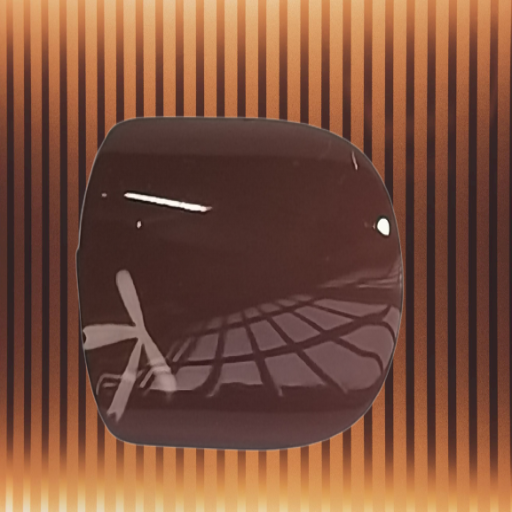

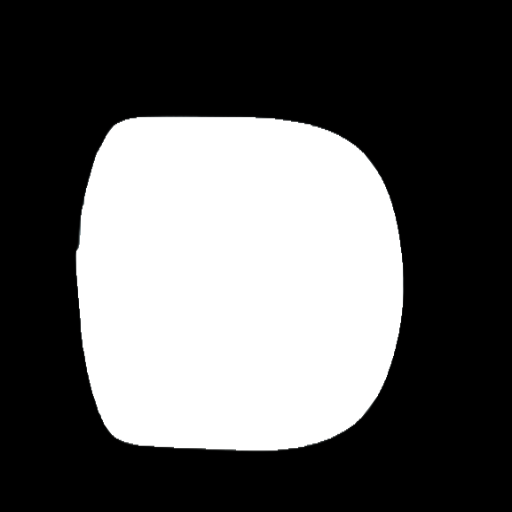

(512, 512, 3)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

AttributeError: ignored

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/dataset_image_inpainting_2_resized/image'
mask_path = '/content/drive/MyDrive/nails_2_opaque_re/mask'
nail_path = '/content/drive/MyDrive/nails_2_opaque_re/image'

for image in os.listdir(nail_path):
  img = cv2.imread(os.path.join(nail_path,image))
  mask = cv2.imread(os.path.join(mask_path,image))
  cv2_imshow(img)
  cv2_imshow(mask)
  print(mask.shape)
  print(np.unique(mask))
  mask -= 255
  print(np.unique(mask))
  masked_img = cv2.bitwise_nand(img,img,mask = mask[:,:,0])
  masked_img = cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR)
  print(masked_img.shape)
  print("Showing masked image")
  cv2_imshow(masked_img)



In [ ]:
import numpy as np
import torch
def prepare_mask_and_masked_image(image, mask):
    image = np.array(image.convert("RGB"))
    #mage = np.array(image)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[None].transpose(0, 3, 1, 2)
    image = torch.from_numpy(image).to(dtype=torch.float32) / 127.5 - 1.0

    mask = np.array(mask.convert("L"))
    mask = mask.astype(np.float32) / 255.0
    mask = mask[None, None]
    mask[mask < 0.5] = 0
    mask[mask >= 0.5] = 1
    mask = torch.from_numpy(mask)
    masked_image = image * (mask < 0.5)

    return mask, masked_image


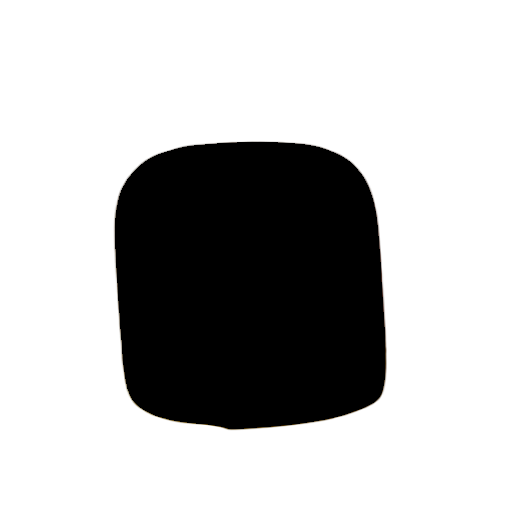

[0. 1.]


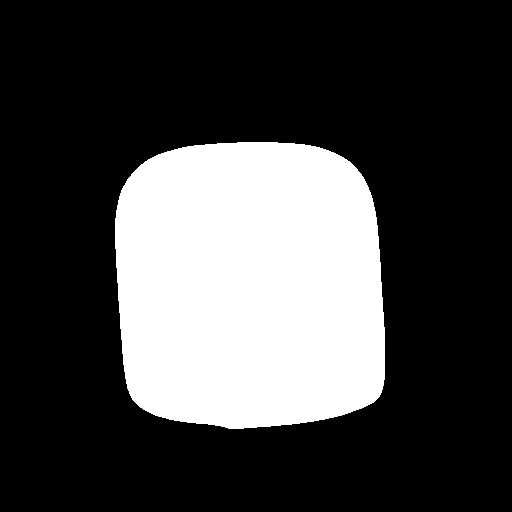

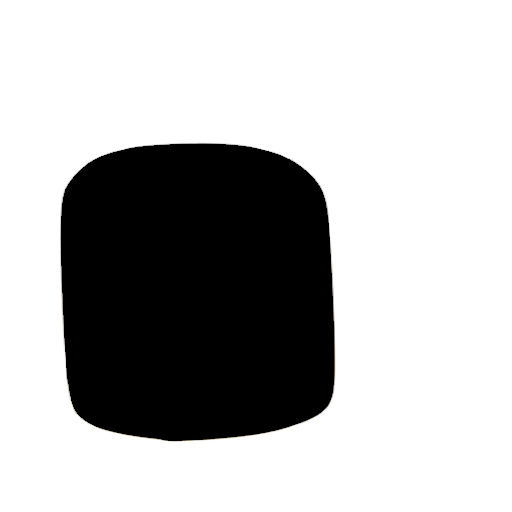

[0. 1.]


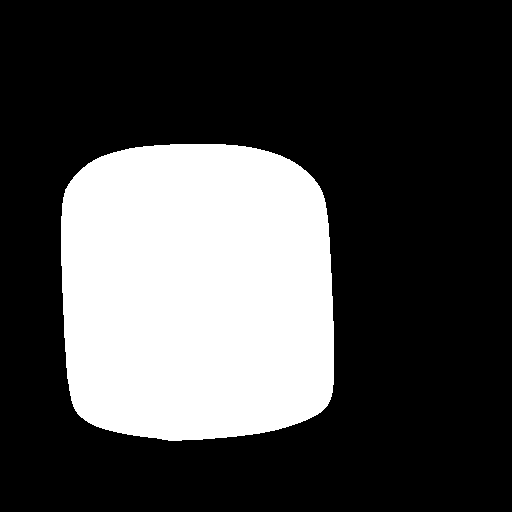

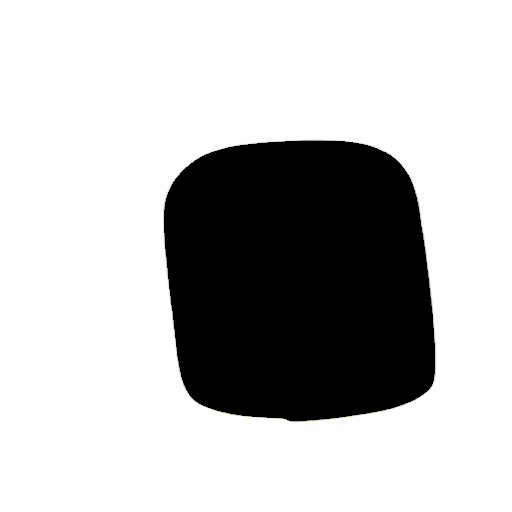

[0. 1.]


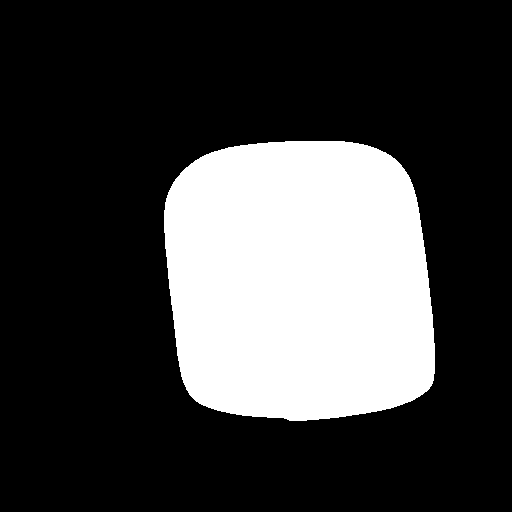

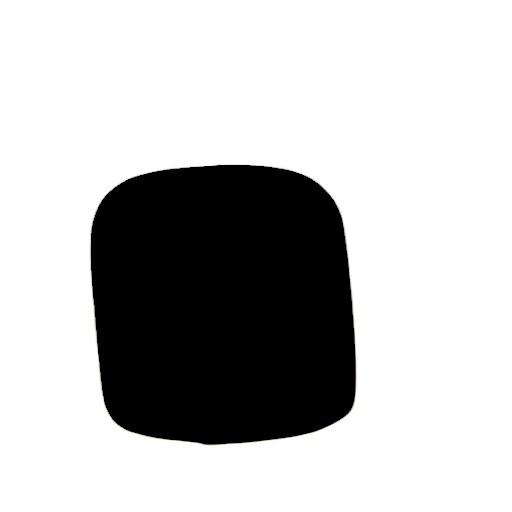

[0. 1.]


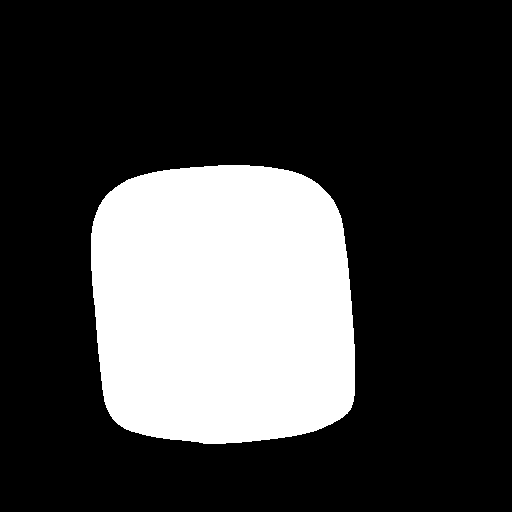

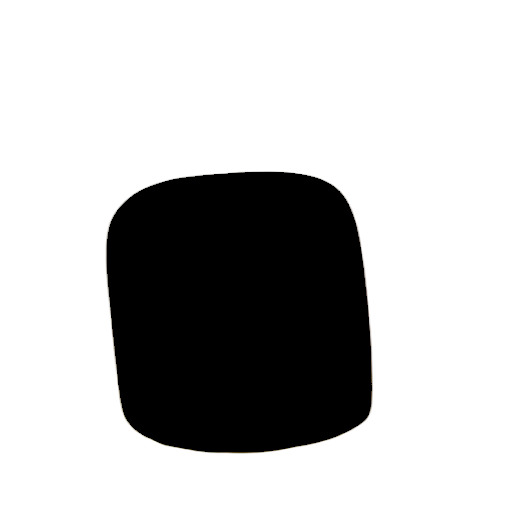

[0. 1.]


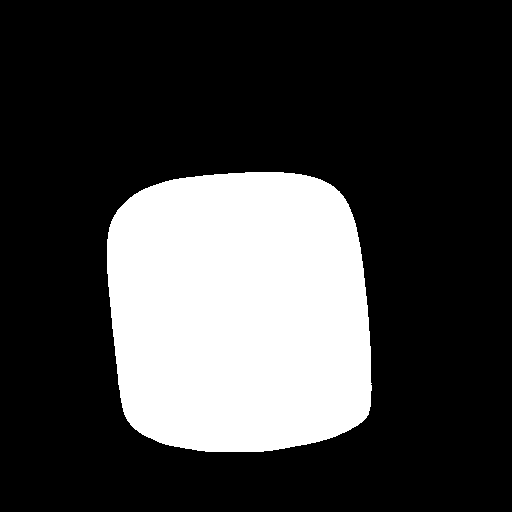

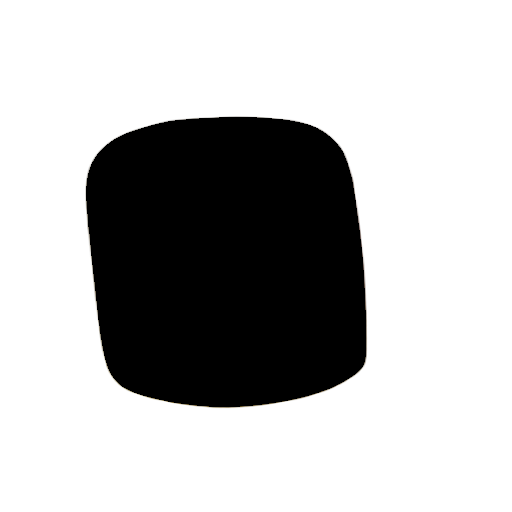

[0. 1.]


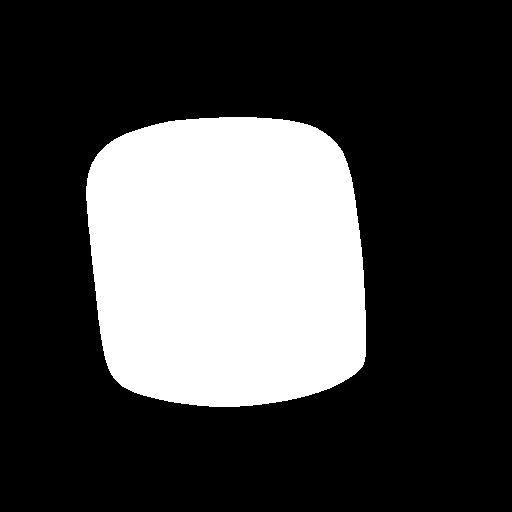

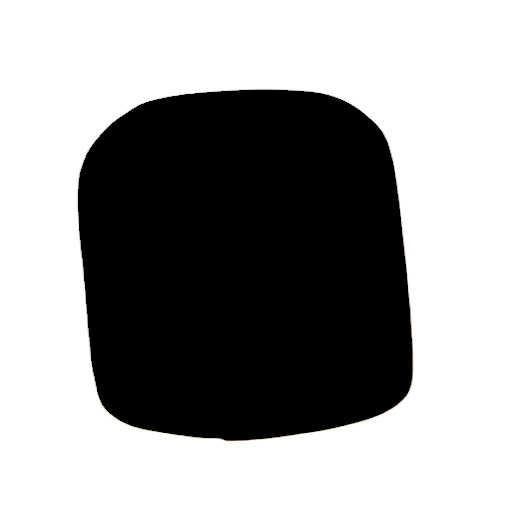

[0. 1.]


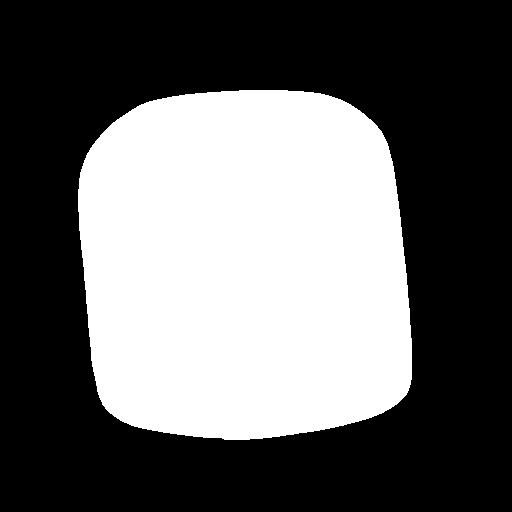

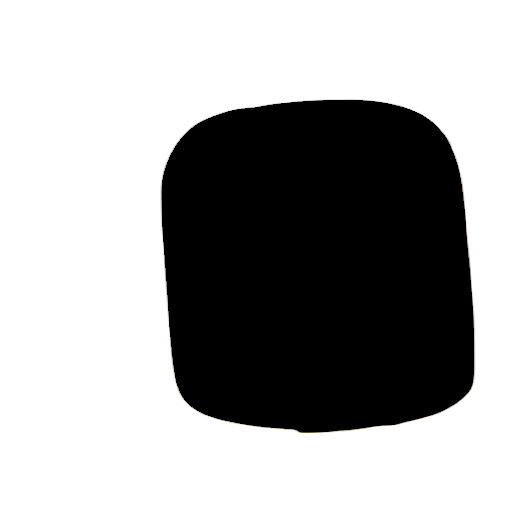

[0. 1.]


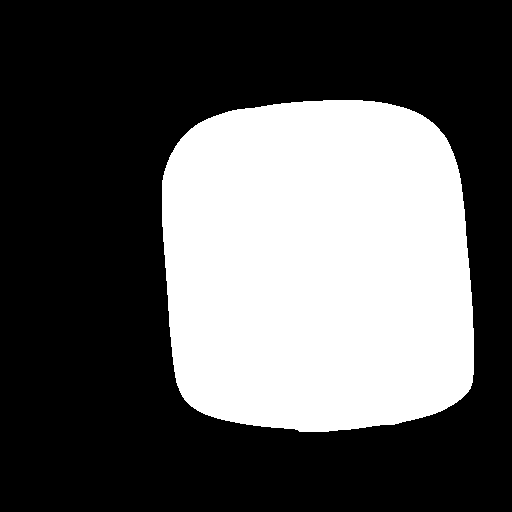

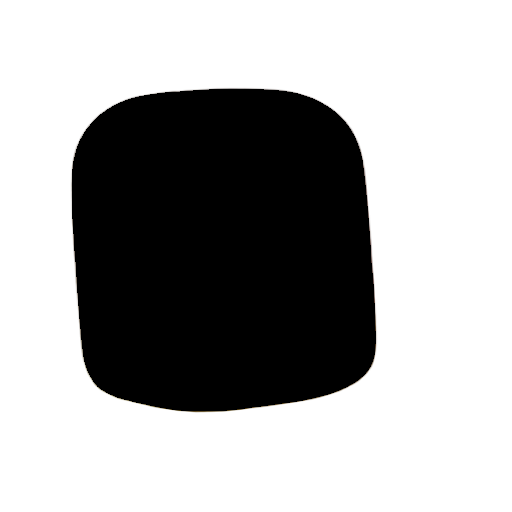

[0. 1.]


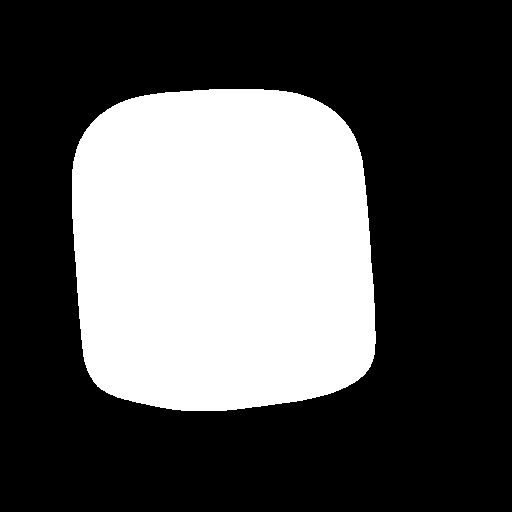

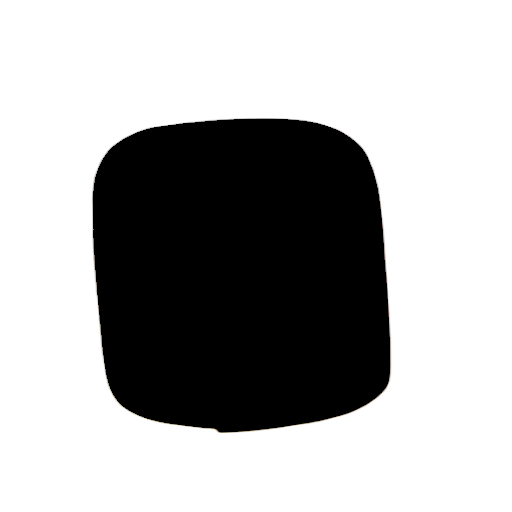

[0. 1.]


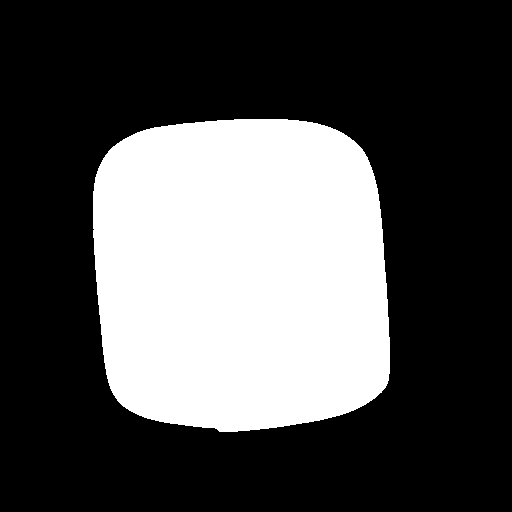

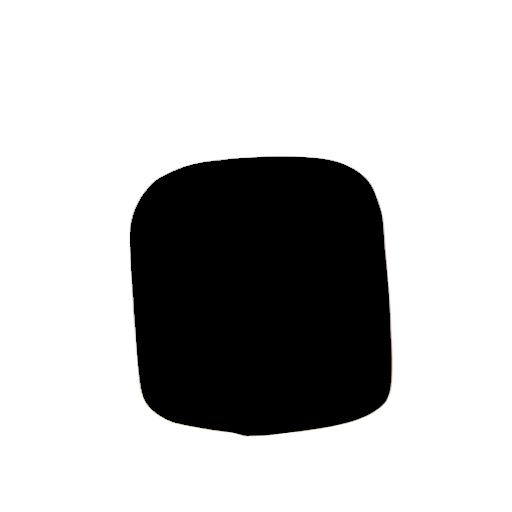

[0. 1.]


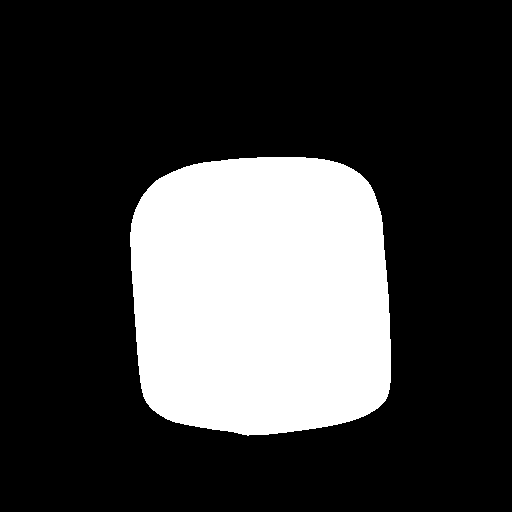

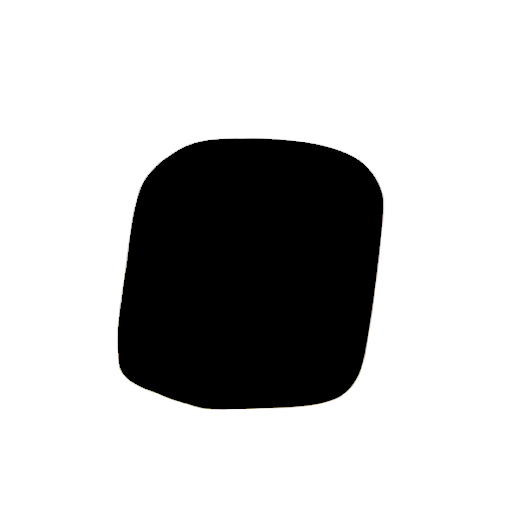

[0. 1.]


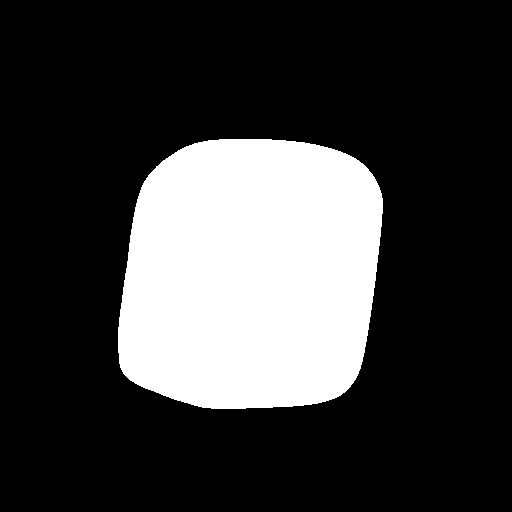

In [ ]:
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/dataset_image_inpainting_2_resized/image'
mask_path = '/content/drive/MyDrive/dataset_image_inpainting_2_resized/mask'
nail_path = '/content/drive/MyDrive/dataset_image_inpainting_2_resized/nail'

for image in os.listdir(nail_path):
  img = Image.open(os.path.join(nail_path,image))
  mask = Image.open(os.path.join(mask_path,image))
  mask = mask.convert('L')
  mask, masked_image = prepare_mask_and_masked_image(img,mask)
  mask = mask.cpu().detach().numpy()
  masked_image = masked_image.cpu().detach().numpy()
  mask = mask[0].transpose(1,2,0)
  masked_image = masked_image[0].transpose(1,2,0)
  masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
  cv2_imshow(masked_image*255)
  print(np.unique(mask))
  cv2_imshow(mask*255)

